In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read CS file of data
df = pd.read_csv('train.csv')

In [3]:
df.shape

(404290, 6)

In [4]:
new_df = df.sample(60000,random_state=3)

In [5]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 226565 to 299426
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            60000 non-null  int64 
 1   qid1          60000 non-null  int64 
 2   qid2          60000 non-null  int64 
 3   question1     60000 non-null  object
 4   question2     60000 non-null  object
 5   is_duplicate  60000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 3.2+ MB


In [6]:
#preprocess method --> for cleaning the text of questions
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

In [7]:
#testing of preprocess method
preprocess("I've completed already but <p> he hasn't</p><b> done</b>?")

'i have completed already but  he has not done'

In [8]:
#applying preprocess method to new_df 
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 226565 to 299426
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            60000 non-null  int64 
 1   qid1          60000 non-null  int64 
 2   qid2          60000 non-null  int64 
 3   question1     60000 non-null  object
 4   question2     60000 non-null  object
 5   is_duplicate  60000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 3.2+ MB


In [10]:
#feature - length of questions
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [11]:
#feature - no. of words in the question
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
226565,226565,197916,175818,how does passage of the gst bill help the comm...,how is gst beneficial for a common man,1,61,38,13,8
23936,23936,44791,44792,is introversion a disadvantaged personality,is introversion a good personality trait,0,43,40,5,6
225231,225231,333518,72110,what do fish do,what do fish do all day,1,15,23,4,6
201711,201711,303778,303779,my axis debit card got block after some wrong ...,my standard charted debit card has got blocked...,0,80,98,17,19
115383,115383,188162,188163,what is the future of sears as e commerce,what is the future of sears,0,41,27,9,6


In [12]:
new_df.shape

(60000, 10)

In [13]:
#method for calculating the no. of common cords in both question1 and question2
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [14]:
#feature - no. of common words in question1 and question2 
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
226565,226565,197916,175818,how does passage of the gst bill help the comm...,how is gst beneficial for a common man,1,61,38,13,8,4
23936,23936,44791,44792,is introversion a disadvantaged personality,is introversion a good personality trait,0,43,40,5,6,4
225231,225231,333518,72110,what do fish do,what do fish do all day,1,15,23,4,6,3
201711,201711,303778,303779,my axis debit card got block after some wrong ...,my standard charted debit card has got blocked...,0,80,98,17,19,15
115383,115383,188162,188163,what is the future of sears as e commerce,what is the future of sears,0,41,27,9,6,6


In [15]:
#method for no. of total words combining question1 and question2 
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [16]:
#feature - added total word 
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
226565,226565,197916,175818,how does passage of the gst bill help the comm...,how is gst beneficial for a common man,1,61,38,13,8,4,20
23936,23936,44791,44792,is introversion a disadvantaged personality,is introversion a good personality trait,0,43,40,5,6,4,11
225231,225231,333518,72110,what do fish do,what do fish do all day,1,15,23,4,6,3,8
201711,201711,303778,303779,my axis debit card got block after some wrong ...,my standard charted debit card has got blocked...,0,80,98,17,19,15,36
115383,115383,188162,188163,what is the future of sears as e commerce,what is the future of sears,0,41,27,9,6,6,15


In [17]:
new_df.shape

(60000, 12)

In [18]:
#feature - sharing word(value lies between 0-1)
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
226565,226565,197916,175818,how does passage of the gst bill help the comm...,how is gst beneficial for a common man,1,61,38,13,8,4,20,0.20
23936,23936,44791,44792,is introversion a disadvantaged personality,is introversion a good personality trait,0,43,40,5,6,4,11,0.36
225231,225231,333518,72110,what do fish do,what do fish do all day,1,15,23,4,6,3,8,0.38
201711,201711,303778,303779,my axis debit card got block after some wrong ...,my standard charted debit card has got blocked...,0,80,98,17,19,15,36,0.42
115383,115383,188162,188163,what is the future of sears as e commerce,what is the future of sears,0,41,27,9,6,6,15,0.40


In [19]:
new_df.shape

(60000, 13)

In [20]:
#method use to fatch the features like ctc_min(ctc --> common token count), ctc_max, last_word_eq, first_word_eq
def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    token_features = [0.0]*6
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    token_features[0] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[1] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    # Last word of both question is same or not
    token_features[2] = int(q1_tokens[-1] == q2_tokens[-1])
    # First word of both question is same or not
    token_features[3] = int(q1_tokens[0] == q2_tokens[0])
    return token_features
 

In [21]:
#features - added received from fetch_token_features()
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["ctc_min"]       = list(map(lambda x: x[0], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[1], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[2], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[3], token_features))

In [22]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,ctc_min,ctc_max,last_word_eq,first_word_eq
226565,226565,197916,175818,how does passage of the gst bill help the comm...,how is gst beneficial for a common man,1,61,38,13,8,4,20,0.20,0.499994,0.307690,0.0,1.0
23936,23936,44791,44792,is introversion a disadvantaged personality,is introversion a good personality trait,0,43,40,5,6,4,11,0.36,0.799984,0.666656,0.0,1.0
225231,225231,333518,72110,what do fish do,what do fish do all day,1,15,23,4,6,3,8,0.38,0.749981,0.499992,0.0,1.0
201711,201711,303778,303779,my axis debit card got block after some wrong ...,my standard charted debit card has got blocked...,0,80,98,17,19,15,36,0.42,0.874995,0.777773,1.0,1.0
115383,115383,188162,188163,what is the future of sears as e commerce,what is the future of sears,0,41,27,9,6,6,15,0.40,0.999983,0.666659,0.0,1.0


In [23]:
new_df.shape

(60000, 17)

In [24]:
#fetch_length_features() has used to extract the feature based on length of questions 
def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    return length_features
    

In [25]:
#feature - added related to length
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
#new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))


In [26]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len
226565,226565,197916,175818,how does passage of the gst bill help the comm...,how is gst beneficial for a common man,1,61,38,13,8,4,20,0.20,0.499994,0.307690,0.0,1.0,5.0,10.5
23936,23936,44791,44792,is introversion a disadvantaged personality,is introversion a good personality trait,0,43,40,5,6,4,11,0.36,0.799984,0.666656,0.0,1.0,1.0,5.5
225231,225231,333518,72110,what do fish do,what do fish do all day,1,15,23,4,6,3,8,0.38,0.749981,0.499992,0.0,1.0,2.0,5.0
201711,201711,303778,303779,my axis debit card got block after some wrong ...,my standard charted debit card has got blocked...,0,80,98,17,19,15,36,0.42,0.874995,0.777773,1.0,1.0,2.0,17.0
115383,115383,188162,188163,what is the future of sears as e commerce,what is the future of sears,0,41,27,9,6,6,15,0.40,0.999983,0.666659,0.0,1.0,3.0,7.5


In [27]:
# Fuzzy Features
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [28]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new features columns from fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [29]:
print(new_df.shape)
new_df.head()

(60000, 23)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
226565,226565,197916,175818,how does passage of the gst bill help the comm...,how is gst beneficial for a common man,1,61,38,13,8,...,0.499994,0.307690,0.0,1.0,5.0,10.5,53,58,53,64
23936,23936,44791,44792,is introversion a disadvantaged personality,is introversion a good personality trait,0,43,40,5,6,...,0.799984,0.666656,0.0,1.0,1.0,5.5,77,72,77,84
225231,225231,333518,72110,what do fish do,what do fish do all day,1,15,23,4,6,...,0.749981,0.499992,0.0,1.0,2.0,5.0,79,100,79,100
201711,201711,303778,303779,my axis debit card got block after some wrong ...,my standard charted debit card has got blocked...,0,80,98,17,19,...,0.874995,0.777773,1.0,1.0,2.0,17.0,87,91,84,93
115383,115383,188162,188163,what is the future of sears as e commerce,what is the future of sears,0,41,27,9,6,...,0.999983,0.666659,0.0,1.0,3.0,7.5,79,100,79,100


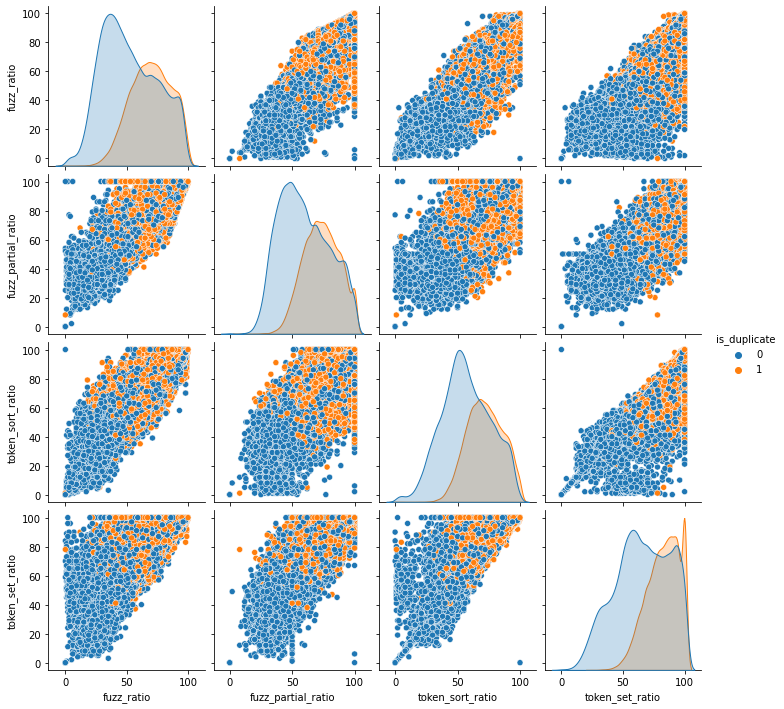

In [30]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [31]:
#dataframe with question1 & question2
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
226565,how does passage of the gst bill help the comm...,how is gst beneficial for a common man
23936,is introversion a disadvantaged personality,is introversion a good personality trait
225231,what do fish do,what do fish do all day
201711,my axis debit card got block after some wrong ...,my standard charted debit card has got blocked...
115383,what is the future of sears as e commerce,what is the future of sears


In [32]:
#final Dataframe used for model training
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()


(60000, 18)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
226565,1,61,38,13,8,4,20,0.20,0.499994,0.307690,0.0,1.0,5.0,10.5,53,58,53,64
23936,0,43,40,5,6,4,11,0.36,0.799984,0.666656,0.0,1.0,1.0,5.5,77,72,77,84
225231,1,15,23,4,6,3,8,0.38,0.749981,0.499992,0.0,1.0,2.0,5.0,79,100,79,100
201711,0,80,98,17,19,15,36,0.42,0.874995,0.777773,1.0,1.0,2.0,17.0,87,91,84,93
115383,0,41,27,9,6,6,15,0.40,0.999983,0.666659,0.0,1.0,3.0,7.5,79,100,79,100


In [33]:
final_df.shape
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
226565,1,61,38,13,8,4,20,0.20,0.499994,0.307690,0.0,1.0,5.0,10.5,53,58,53,64
23936,0,43,40,5,6,4,11,0.36,0.799984,0.666656,0.0,1.0,1.0,5.5,77,72,77,84
225231,1,15,23,4,6,3,8,0.38,0.749981,0.499992,0.0,1.0,2.0,5.0,79,100,79,100
201711,0,80,98,17,19,15,36,0.42,0.874995,0.777773,1.0,1.0,2.0,17.0,87,91,84,93
115383,0,41,27,9,6,6,15,0.40,0.999983,0.666659,0.0,1.0,3.0,7.5,79,100,79,100


In [34]:
#tfidf techniques used here
from sklearn.feature_extraction.text import TfidfVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])
#selecting the 3000 most common words as features
tfidf = TfidfVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(tfidf.fit_transform(questions).toarray(),2)

In [35]:
#dataframe of features collected from CountVectorizer 
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(60000, 6000)

In [36]:
final_df.shape

(60000, 18)

In [37]:
#concatenating final_df(custom features) and temp_df(CountVectorizer Features)
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(60000, 6018)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,ctc_min,ctc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
226565,1,61,38,13,8,4,20,0.20,0.499994,0.307690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23936,0,43,40,5,6,4,11,0.36,0.799984,0.666656,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225231,1,15,23,4,6,3,8,0.38,0.749981,0.499992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201711,0,80,98,17,19,15,36,0.42,0.874995,0.777773,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115383,0,41,27,9,6,6,15,0.40,0.999983,0.666659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#splitting training testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [39]:
X_train.shape


(48000, 6017)

In [40]:
#RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred1 = rf.predict(X_test)
accuracy_score(y_test,y_pred1)

0.79175

In [41]:
#DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
y_pred2 = clf.predict(X_test)
accuracy_score(y_test,y_pred2)

0.73325

In [42]:
#LogisticRegression model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred3 = lr.predict(X_test)
accuracy_score(y_test,y_pred3)

0.6884166666666667

In [43]:
#GaussianNB model
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train, y_train)
y_pred4 = gnb.predict(X_test)
accuracy_score(y_test,y_pred4)

0.6373333333333333

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
#confusion matrix for all models
rf_cmatrix=confusion_matrix(y_test,y_pred1)
clf_cmatrix=confusion_matrix(y_test,y_pred2)
lr_cmatrix=confusion_matrix(y_test,y_pred3)
gnb_cmatrix=confusion_matrix(y_test,y_pred4)

In [46]:
#store all model object as single object
combine=[rf_cmatrix, clf_cmatrix, lr_cmatrix, gnb_cmatrix]


In [47]:
# testing features similar to training

In [48]:

def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [49]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [50]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    token_features = [0.0]*4
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

    token_features[0] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[1] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[2] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[3] = int(q1_tokens[0] == q2_tokens[0])

    return token_features


In [51]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*2
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    return length_features

In [52]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [53]:
#this method is reposible to perform feature extraction of new data comes for prediction
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = tfidf.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = tfidf.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,17),q1_bow,q2_bow))

In [54]:
#testing of prediction with help of example
q1 = 'What is the current capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the capital of India?'
r='What happens if you put milk in a coffee maker?'
s='What would happen if I put milk instead of water in my automatic drip coffee maker?'

In [55]:
lr.predict(query_point_creator(q1, q4))


array([1], dtype=int64)

In [56]:
tfidf

TfidfVectorizer(max_features=3000)

In [57]:
#saving objects related to TfidftVectorizer object(tfidf.pkl), confusionMatrix object(tfidf_accuracy.pkl), object of set of models(model2_tfidf.pkl) 
import pickle

pickle.dump(combine,open('tfidf_accuracy.pkl','wb'))

pickle.dump(tfidf,open('tfidf.pkl','wb'))
model=[rf, clf, lr, gnb]

pickle.dump(model,open('model2_tfidf.pkl','wb'))